**IMA-602 Herramientas básicas para el Análisis de Datos**

# Tarea Control de Versiones

**Autores:** Ernesto Pedrero Alecoy - Carolina Reyes Miro - Angel Santos Sanzana - Cristobal Zambrano Rabanal

**Profesores:** Walter Gómez y Nicolás Caro

**Fecha:** 12 de junio 2022


---



Considere el archivo de datos correspondiente a su grupo adjunto a la tarea en la plataforma. El
archivo contiene 4 columnas: Año, Mes, Fecha (como variable continua) y CO2 (concentración). El
objetivo final de la tarea es ajustar una función F(t) que describa aproximadamente la dependencia
de la concentración respecto a la fecha. Para ello se deben seguir los siguientes pasos, utilizando la
librería scipy.optimize para optimizar.

# Parte 1
El dato de CO2 debe ser un número real positivo. Identifique el intervalo de tiempo continuo
(meses consecutivos) más extenso que cumple tres condiciones:

* El intervalo termina con la última observación de Septiembre 2020.
* El intervalo comienza con una observación con un dato válido de CO2.
* En todo el intervalo más del 95% de las observaciones tienen un dato de CO2 válido.

Extraiga ese intervalo como la base de datos a ser utilizada en esta tarea.


In [1]:
import pandas as pd

# Read a comma-separated values (csv) file into DataFrame.
# La separacion esta dada por ;, por lo que hay que cambiarlo.

# Se usa el encoding latin1 para que pueda leer todo el archivo sin problemas

Datos_svc= pd.read_csv("Grupo_3_data_CO2_short.csv", sep=',', encoding = 'latin1')

Datos_svc=Datos_svc.set_axis(['Yr', 'Mn', 'Date', 'CO2'], axis=1)
Datos_svc

,Yr,Mn,Date,CO2
0,1957,6,1957.4548,312.79
1,1957,7,1957.5370,-99.99
2,1957,8,1957.6219,-99.99
3,1957,9,1957.7068,-99.99
4,1957,10,1957.7890,-99.99
...,...,...,...,...
755,2020,5,2020.3716,409.48
756,2020,6,2020.4563,409.75
757,2020,7,2020.5383,410.18
758,2020,8,2020.6230,410.78


In [2]:
# Se muestran cuantos datos son negativos ('no válidos').
Nendataframe=pd.DataFrame(Datos_svc.T.iloc[3]<=0)
Nendataframe.value_counts()

CO2  
False    676
True      84
dtype: int64

In [3]:
# Se muestra el tipo de dato y si existen datos nulos por columna.
Datos_svc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 760 entries, 0 to 759
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Yr      760 non-null    int64  
 1   Mn      760 non-null    int64  
 2   Date    760 non-null    float64
 3   CO2     760 non-null    float64
dtypes: float64(2), int64(2)
memory usage: 23.9 KB


In [4]:
negatividad=[True]
Error=[]
for i in range(759,-1,-1):

    
    if Datos_svc.T.iloc[3][i]<=0:
        negatividad.append(True)
    else:
        negatividad.append(False)
    
    dfposi=pd.DataFrame(negatividad)

    errora=(dfposi.value_counts()[True]-1)/(dfposi.value_counts()[False]+dfposi.value_counts()[True]-1)
    Error.append(errora)

Error.reverse()
negatividad.reverse()
Error

[0.11052631578947368,
 0.11067193675889328,
 0.10949868073878628,
 0.1083223249669749,
 0.10714285714285714,
 0.10596026490066225,
 0.10477453580901856,
 0.1049136786188579,
 0.10372340425531915,
 0.10252996005326231,
 0.10266666666666667,
 0.10146862483311081,
 0.10026737967914438,
 0.10040160642570281,
 0.09919571045576407,
 0.09798657718120805,
 0.09811827956989247,
 0.09690444145356662,
 0.09568733153638814,
 0.09446693657219973,
 0.0945945945945946,
 0.09472259810554803,
 0.0948509485094851,
 0.09362279511533243,
 0.09239130434782608,
 0.09115646258503401,
 0.08991825613079019,
 0.09004092769440655,
 0.09016393442622951,
 0.08891928864569083,
 0.08904109589041095,
 0.0877914951989026,
 0.08653846153846154,
 0.08528198074277854,
 0.08402203856749312,
 0.08275862068965517,
 0.08149171270718232,
 0.08160442600276625,
 0.0817174515235457,
 0.08183079056865465,
 0.08055555555555556,
 0.07927677329624479,
 0.07799442896935933,
 0.07670850767085077,
 0.07541899441340782,
 0.0741258741258

In [5]:
bolean=0
columna=0
for i in range(0,760):
    if Error[i]<0.05 and bolean==0 and negatividad[i]==False:
        bolean=1
        columna=i

columna

97

In [6]:
# Se muestra el resultado final, donde Datos_limpios corresponde a 
# un dataFrame que cumple con todas las condiciones indicadas.
Datos_limpios=Datos_svc[columna:len(Error)]
Datos_limpios

,Yr,Mn,Date,CO2
97,1965,7,1965.5370,319.39
98,1965,8,1965.6219,319.68
99,1965,9,1965.7068,-99.99
100,1965,10,1965.7890,-99.99
101,1965,11,1965.8740,320.17
...,...,...,...,...
755,2020,5,2020.3716,409.48
756,2020,6,2020.4563,409.75
757,2020,7,2020.5383,410.18
758,2020,8,2020.6230,410.78


In [7]:
# Se muestran cuantos datos son negativos ('no válidos').
Nendataframe=pd.DataFrame(Datos_limpios.T.iloc[3]<=0)
Nendataframe.value_counts()

CO2  
False    630
True      33
dtype: int64

# Parte 2
Cree una nueva columna ’CO2 completa’ que rellene los datos de CO2 faltantes de su base de
datos utilizando la siguiente metodología:
* Identificar cada intervalo que comienza y termina con una observación válida, pero que
tiene entremedio solo observaciones faltantes de CO2, por ejemplo como el siguiente
(mostrando solo fecha y CO2):
${. . . (1958.7068, 315.33)(1958.7890, −99.99)(1958.8740, −99.99)(1959.9562, −99.99)(1959.0411, 315.09) . . .}$,

* Rellenar los valores intermedios del intervalo utilizando la recta que une los extremos
del intervalo. En el ejemplo anterior sería la recta $C(t)=\frac{1}{0.3343}[(t-1958.7068)\cdot 315.09-(t-1959.0411)\cdot 315.33]$, que genera la siguiente secuencia rellenada:

${. . . (1958.7068, 315.33)(1958.7890, 315.271)(1958.8740, 315.210)(1959.9562, 315.151)(1959.0411, 315.09) . . .}$

In [8]:
# En esta celda se busca los intervalos pedidos, empezando con un positivo y terminando con positivo
# y conteniendo entremedio solo valores negativos
indice_neg=[]

for i in range(97,760):

    if  Datos_limpios.CO2[i]<0:
        indice_neg.append(i)

nums = sorted(set(indice_neg))
gaps = [[s, e] for s, e in zip(nums, nums[1:]) if s+1 < e]
edges = iter(nums[:1] + sum(gaps, []) + nums[-1:])

intervalos_ddd=list(zip(edges, edges))
intervalos=[]

for i in range(len(intervalos_ddd)):
    intervalos.append((intervalos_ddd[i][0]-1,intervalos_ddd[i][1]+1))

intervalos

[(98, 101),
 (108, 110),
 (114, 116),
 (116, 118),
 (127, 130),
 (132, 138),
 (139, 141),
 (149, 151),
 (161, 163),
 (169, 171),
 (171, 173),
 (173, 177),
 (250, 252),
 (272, 274),
 (294, 296),
 (319, 321),
 (402, 404),
 (503, 505),
 (512, 514),
 (576, 579),
 (585, 587),
 (593, 595),
 (724, 726),
 (732, 734)]

In [9]:
# Aqui obtengo los intervalos de solo negativos, para su facil trabajo en la siguiente celda
m=[]
n=[]

for i in range(len(intervalos)):
    m.append((Datos_limpios.CO2[intervalos[i][0]]-Datos_limpios.CO2[intervalos[i][1]])/(Datos_limpios.Date[intervalos[i][0]]-Datos_limpios.Date[intervalos[i][1]]))
    n.append(-m[i]*Datos_limpios.Date[intervalos[i][0]]+Datos_limpios.CO2[intervalos[i][0]])
    
intervalos_ddd

[(99, 100),
 (109, 109),
 (115, 115),
 (117, 117),
 (128, 129),
 (133, 137),
 (140, 140),
 (150, 150),
 (162, 162),
 (170, 170),
 (172, 172),
 (174, 176),
 (251, 251),
 (273, 273),
 (295, 295),
 (320, 320),
 (403, 403),
 (504, 504),
 (513, 513),
 (577, 578),
 (586, 586),
 (594, 594),
 (725, 725),
 (733, 733)]

In [10]:
# y datos por los que reemplazar los negativos.
y=[] # y = m*x + n

# El indice i corresponde al numero de dato que es negativo,
# y[0] corresponde al primer dato negativo, y[1] corresponde al segundp dato negativo.
for i in range(len(intervalos)):
    for j in range(intervalos_ddd[i][0],intervalos_ddd[i][1]+1):
        y.append(m[i]*Datos_limpios.Date[j]+n[i])
        
y

[319.8450178500593,
 320.00478778262595,
 320.77007181328645,
 321.03,
 320.9335930735931,
 321.5640707964602,
 321.59592920353975,
 321.6384399999997,
 321.84341399999994,
 322.04838799999925,
 322.2465860000002,
 322.4515599999995,
 322.30746287128727,
 323.8271813285455,
 325.0235547576294,
 325.47000000000116,
 325.7503349282297,
 325.56107887579265,
 325.3868147476578,
 325.21275611967303,
 333.1867684021536,
 335.93395973154384,
 338.7750000000001,
 341.8181208053684,
 352.39500000000044,
 365.40992818671475,
 366.5255033557047,
 376.96078571428734,
 377.39539285714454,
 377.89843301435394,
 379.37096947935356,
 403.83100478468896,
 405.4920825852787]

In [11]:
# Se crea una nueva columna (una copia de la columna CO2) 
# para reemplazar los datos con la interpolación.
Datos_limpios["CO2_Completa"]=Datos_limpios.CO2
Datos_limpios

C:\Users\Angel\AppData\Local\Temp\ipykernel_22476\155735336.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datos_limpios["CO2_Completa"]=Datos_limpios.CO2


,Yr,Mn,Date,CO2,CO2_Completa
97,1965,7,1965.5370,319.39,319.39
98,1965,8,1965.6219,319.68,319.68
99,1965,9,1965.7068,-99.99,-99.99
100,1965,10,1965.7890,-99.99,-99.99
101,1965,11,1965.8740,320.17,320.17
...,...,...,...,...,...
755,2020,5,2020.3716,409.48,409.48
756,2020,6,2020.4563,409.75,409.75
757,2020,7,2020.5383,410.18,410.18
758,2020,8,2020.6230,410.78,410.78


In [12]:
contador=0
for i in range(Datos_limpios.CO2.count()):

    if Datos_limpios.iloc[i,4]<0:
        
        Datos_limpios.iloc[i,4]=y[contador]
        contador=contador+1

# dataframe con la nueva columna sin negativos a través del metodo dado.
Datos_limpios 

,Yr,Mn,Date,CO2,CO2_Completa
97,1965,7,1965.5370,319.39,319.390000
98,1965,8,1965.6219,319.68,319.680000
99,1965,9,1965.7068,-99.99,319.845018
100,1965,10,1965.7890,-99.99,320.004788
101,1965,11,1965.8740,320.17,320.170000
...,...,...,...,...,...
755,2020,5,2020.3716,409.48,409.480000
756,2020,6,2020.4563,409.75,409.750000
757,2020,7,2020.5383,410.18,410.180000
758,2020,8,2020.6230,410.78,410.780000


In [13]:
# Se muestran cuantos datos son negativos ('no válidos').
Nendataframe=pd.DataFrame(Datos_limpios.T.iloc[4]<=0)
Nendataframe.value_counts()

CO2_Completa
False           663
dtype: int64

Aquí se puede observar que la cantidad de datos negativos es cero.

## Parte 3
Ajuste una función polinomial de grado $n$ de la forma
$F_{\theta }(t)=\theta _{0}+\theta _{1}(t-T)+\theta _{2}(t-T)^2+...+\theta _{n}(t-T)^n$

que minimice el error cuadrático medio (donde T es la primera fecha de sus datos) . O sea,
para un valor del grado $n$ dado, resuelva el problema:

$\underset{\theta}{min}\frac{1}{N}\sum_{j=1}^{N}(x_{j}-F_{\theta }(t_{j}))^2$

donde $N$ es el número total de datos, $t_{j}$ la variable fecha y $x_{j}$ la variable $CO2$_$completa$. Pruebe
con los valores $n = 0, 1, 2, 3, 4$ y muestre los resultados obtenidos indicando en cada caso:
* Los valores optimales del vector $\theta$.
* El valor optimal de la función de error cuadrático medio.
* Tiempo requerido en el proceso de optimización.
* Un gráfico que contenga el ploteo de dos curvas, una con los puntos originales y otra con la función $F_{\theta }(t)$ obtenida.

In [14]:
# Se importan librerías de utilidad.
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy.optimize import curve_fit,least_squares
from scipy import optimize
import time 

In [15]:
# Se crea una nueva columna donde se calcula t-T para usarse en las funciones
Datos_limpios['t_T'] = Datos_limpios.apply(lambda x:x['Date']-Datos_limpios.Date.values[0],axis=1)
Datos_limpios

C:\Users\Angel\AppData\Local\Temp\ipykernel_22476\1951455330.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datos_limpios['t_T'] = Datos_limpios.apply(lambda x:x['Date']-Datos_limpios.Date.values[0],axis=1)


,Yr,Mn,Date,CO2,CO2_Completa,t_T
97,1965,7,1965.5370,319.39,319.390000,0.0000
98,1965,8,1965.6219,319.68,319.680000,0.0849
99,1965,9,1965.7068,-99.99,319.845018,0.1698
100,1965,10,1965.7890,-99.99,320.004788,0.2520
101,1965,11,1965.8740,320.17,320.170000,0.3370
...,...,...,...,...,...,...
755,2020,5,2020.3716,409.48,409.480000,54.8346
756,2020,6,2020.4563,409.75,409.750000,54.9193
757,2020,7,2020.5383,410.18,410.180000,55.0013
758,2020,8,2020.6230,410.78,410.780000,55.0860


#### Ajuste Polinomia Grado $n=0$

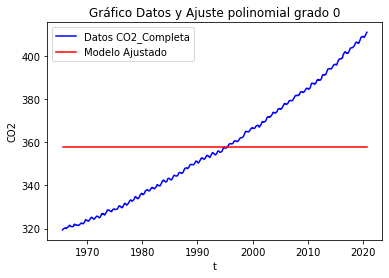

Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 0 son:

97     358.041273
98     358.041273
99     358.041273
100    358.041273
101    358.041273
          ...    
755    358.041273
756    358.041273
757    358.041273
758    358.041273
759    358.041273
Name: t_T, Length: 663, dtype: float64


Valor de theta_0:  [358.04127299]
El tiempo de iteración es:  0.1560359001159668


In [16]:
start = time.time()
# Se define una función polinomial de grado cero.
def pol0(x, a_0):
    return a_0*(x**0)

x = Datos_limpios.t_T
y = Datos_limpios.CO2_Completa
w = Datos_limpios.Date

popt,cov = scipy.optimize.curve_fit(pol0, x, y)
a_0 = popt

# Se grafica la interpolación y la data original.
ypol0=pol0(x, a_0)
plt.title("Gráfico Datos y Ajuste polinomial grado 0")
plt.plot(w,y,color="blue",label='Datos CO2_Completa'),plt.plot(w,ypol0,color="red",label='Modelo Ajustado')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2')
plt.show() 

# Se muestran por pantalla los resultados.
print('Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 0 son:\n')
print(ypol0) 
print('\n')
print('Valor de theta_0: ', a_0)
end = time.time()
tiempo_pol0=end-start
print('El tiempo de iteración es: ', tiempo_pol0)

In [17]:
#Error cuadratico medio de f(theta), n=0, con CO2 completa
ECM_theta=sum((y-ypol0)**2)/len(y)
ECM_theta

683.1226196158236

#### Ajuste Polinomial Grado $n=1$

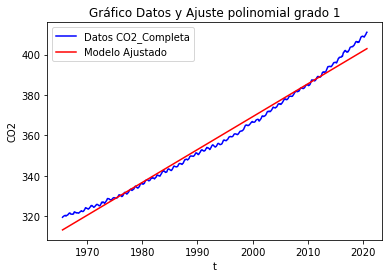

Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 1 son:

97     313.129768
98     313.267992
99     313.406217
100    313.540045
101    313.678432
          ...    
755    402.405118
756    402.543016
757    402.676519
758    402.814418
759    402.952317
Name: t_T, Length: 663, dtype: float64


Valor de theta_0:  313.1297678705724
Valor de theta_1:  1.6280842697590177
El tiempo de iteración es:  0.13202953338623047


In [18]:
start = time.time()
# Se define una función polinomial de grado uno.
def pol1(x, b_1, a_1):
    return a_1 + b_1*x

x = Datos_limpios.t_T
y = Datos_limpios.CO2_Completa
w = Datos_limpios.Date

popt,cov = scipy.optimize.curve_fit(pol1, x, y)
b_1,a_1= popt

# Se grafica la interpolación y la data original.
ypol1=pol1(x,b_1,a_1)
plt.title("Gráfico Datos y Ajuste polinomial grado 1")
plt.plot(w,y,color="blue",label='Datos CO2_Completa'),plt.plot(w,ypol1,color="red",label='Modelo Ajustado')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2')
plt.show() 

# Se muestran por pantalla los resultados.
print('Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 1 son:\n')
print(ypol1)
print('\n')
print('Valor de theta_0: ', a_1)
print('Valor de theta_1: ', b_1) 
end = time.time()
tiempo_pol1=end-start
print('El tiempo de iteración es: ', tiempo_pol1)

In [19]:
#Error cuadratico medio de f(theta), n=1, con CO2 completa
ECM_theta=sum((y-ypol1)**2)/len(y)
ECM_theta

8.848440074543722

#### Ajuste Polinomial Grado $n=2$

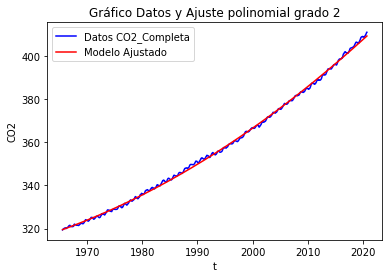

Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 2 son:

97     319.528232
98     319.607385
99     319.686719
100    319.763705
101    319.843492
          ...    
755    408.570601
756    408.766894
757    408.957102
758    409.153751
759    409.350582
Name: t_T, Length: 663, dtype: float64


Valor de theta_0:  319.5282316210255
Valor de theta_1:  0.9312350292821835
Valor de theta_2:  0.012630719566366144
El tiempo de iteración es:  0.1310286521911621


In [20]:
start = time.time()
# Se define una función polinomial de grado dos.
def pol2(x, c_2, b_2, a_2):
    return a_2 + b_2*x + c_2*x**2

x = Datos_limpios.t_T
y = Datos_limpios.CO2_Completa
w = Datos_limpios.Date

popt,cov = scipy.optimize.curve_fit(pol2, x, y)
c_2,b_2,a_2= popt

# Se grafica la interpolación y la data original.
ypol2=pol2(x,c_2,b_2,a_2)
plt.title("Gráfico Datos y Ajuste polinomial grado 2")
plt.plot(w,y,color="blue",label='Datos CO2_Completa'),plt.plot(w,ypol2,color="red",label='Modelo Ajustado')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2')
plt.show()

# Se muestran por pantalla los resultados.
print('Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 2 son:\n')
print(ypol2)
print('\n')
print('Valor de theta_0: ', a_2) 
print('Valor de theta_1: ', b_2) 
print('Valor de theta_2: ', c_2) 
end = time.time()
tiempo_pol2=end-start
print('El tiempo de iteración es: ', tiempo_pol2)

In [21]:
#Error cuadratico medio de f(theta), n=2, con CO2 completa
ECM_theta=sum((y-ypol2)**2)/len(y)
ECM_theta

0.5897664710332453

#### Ajuste Polinomial Grado $n=3$

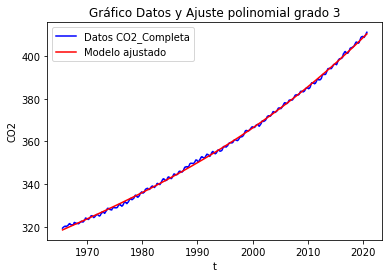

Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 3 son:

97     318.561930
98     318.658922
99     318.755959
100    318.849952
101    318.947193
          ...    
755    409.467025
756    409.680710
757    409.887885
758    410.102195
759    410.316822
Name: t_T, Length: 663, dtype: float64


Valor de theta_0:  318.5619297445032
Valor de theta_1:  1.1421666593081499
Valor de theta_2:  0.0030657865819139055
Valor de theta_3:  0.00011557925194841305
El tiempo de iteración es:  0.13103032112121582


In [22]:
start = time.time()
# Se define una función polinomial de grado tres.
def pol3(x, d_3, c_3, b_3, a_3):
    return a_3 + b_3*x + c_3*x**2 + d_3*x**3

x = Datos_limpios.t_T
y = Datos_limpios.CO2_Completa
w = Datos_limpios.Date

popt,cov = scipy.optimize.curve_fit(pol3, x, y)
d_3,c_3,b_3,a_3= popt

# Se grafica la interpolación y la data original.
ypol3=pol3(x,d_3,c_3,b_3,a_3)
plt.title("Gráfico Datos y Ajuste polinomial grado 3")
plt.plot(w,y,color="blue",label='Datos CO2_Completa'),plt.plot(w,ypol3,color="red",label='Modelo ajustado')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2')
plt.show()

# Se muestran por pantalla los resultados.
print('Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 3 son:\n')
print(ypol3)
print('\n')
print('Valor de theta_0: ', a_3) 
print('Valor de theta_1: ', b_3) 
print('Valor de theta_2: ', c_3) 
print('Valor de theta_3: ', d_3)
end = time.time()
tiempo_pol3=end-start
print('El tiempo de iteración es: ', tiempo_pol3)

In [23]:
#Error cuadratico medio de f(theta), n=3, con CO2 completa
ECM_theta=sum((y-ypol3)**2)/len(y)
ECM_theta

0.45406327034126004

#### Ajuste polinomial grado $n=4$

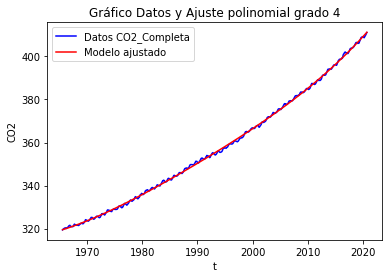

Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 4 son:

97     319.487264
98     319.555790
99     319.624756
100    319.691945
101    319.761852
          ...    
755    410.281875
756    410.522799
757    410.756715
758    410.999029
759    411.242054
Name: t_T, Length: 663, dtype: float64


Valor de theta_0:  319.4872636683789
Valor de theta_1:  0.8045470889766508
Valor de theta_2:  0.0306496476575608
Valor de theta_3:  -0.0006625232668569394
Valor de theta_4:  7.0517338192743766e-06
El tiempo de iteración es:  0.140031099319458


In [24]:
start = time.time()
# Se define una función polinomial de grado cuatro.
def pol4(x, a_4, b_4, c_4, d_4, e_4):
    return a_4 + b_4*x + c_4*x**2 + d_4*x**3 + e_4*x**4

x = Datos_limpios.t_T
y = Datos_limpios.CO2_Completa
w = Datos_limpios.Date

popt,cov = scipy.optimize.curve_fit(pol4, x, y)
a_4, b_4, c_4, d_4, e_4= popt

# Se grafica la interpolación y la data original.
ypol4=pol4(x,a_4, b_4, c_4, d_4, e_4)
plt.title("Gráfico Datos y Ajuste polinomial grado 4")
plt.plot(w,y,color="blue",label='Datos CO2_Completa'),plt.plot(w,ypol4,color="red",label='Modelo ajustado')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2')
plt.show() 

# Se muestran por pantalla los resultados.
print('Los valores óptimos de F_theta cuando se ajusta a un polinomio de grado n = 4 son:\n')
print(ypol4)
print('\n')
print('Valor de theta_0: ', a_4) 
print('Valor de theta_1: ', b_4) 
print('Valor de theta_2: ', c_4) 
print('Valor de theta_3: ', d_4) 
print('Valor de theta_4: ', e_4) 
end = time.time()
tiempo_pol4=end-start
print('El tiempo de iteración es: ', tiempo_pol4)

In [25]:
#Error cuadratico medio de f(theta), n=4, con CO2 completa
ECM_theta=sum((y-ypol4)**2)/len(y)
ECM_theta

0.35615928247656403

## Parte 4
Seleccione una de las funciones ajustadas que a su criterio mejor aproxima los datos y genere una nueva columna CO2_completa que contenga para cada fecha la resta de CO2_completa
menos el valor de la función $F_{\theta }(t)$ seleccionada. Indique la media y la desviación standard de
$CO2$_$completa$.


A medida que aumentamos el grado de nuestro ajuste polinomial, la curva obtenida tiene menor error, por lo que utilizaremos el ajuste polinomial de grado $n=4$

$$F_{\theta}(t)=\sum_{i=0}^4\theta_i(t_i-T)^{i}$$

donde los valores de los $\theta$ óptimos son

In [26]:
# Para calculo de error cuadratico medio.
z=Datos_limpios.CO2_Completa

# Se calcula el error cuadratico medio ,ECM , de cada funcion con CO2 completa
print(sum((z-ypol0)**2)/len(z))
print(sum((z-ypol1)**2)/len(z))
print(sum((z-ypol2)**2)/len(z))
print(sum((z-ypol3)**2)/len(z))
print(sum((z-ypol4)**2)/len(z))

683.1226196158236
8.848440074543722
0.5897664710332453
0.45406327034126004
0.35615928247656403


El ajustamiento con menor error cuadratico medio fue con n=4, y el valor de la columna $F_{\theta}(t)$ es

In [27]:
F_theta=ypol4
print(F_theta)

97     319.487264
98     319.555790
99     319.624756
100    319.691945
101    319.761852
          ...    
755    410.281875
756    410.522799
757    410.756715
758    410.999029
759    411.242054
Name: t_T, Length: 663, dtype: float64


Creamos la nueva columna $CO2\_Centrado$

In [28]:
Datos_limpios['F_theta']=ypol4
Datos_limpios['CO2_Centrado'] = Datos_limpios.apply(lambda x:x['CO2_Completa']-x['F_theta'],axis=1)
Datos_limpios

C:\Users\Angel\AppData\Local\Temp\ipykernel_22476\1066909054.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datos_limpios['F_theta']=ypol4
C:\Users\Angel\AppData\Local\Temp\ipykernel_22476\1066909054.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Datos_limpios['CO2_Centrado'] = Datos_limpios.apply(lambda x:x['CO2_Completa']-x['F_theta'],axis=1)


,Yr,Mn,Date,CO2,CO2_Completa,t_T,F_theta,CO2_Centrado
97,1965,7,1965.5370,319.39,319.390000,0.0000,319.487264,-0.097264
98,1965,8,1965.6219,319.68,319.680000,0.0849,319.555790,0.124210
99,1965,9,1965.7068,-99.99,319.845018,0.1698,319.624756,0.220262
100,1965,10,1965.7890,-99.99,320.004788,0.2520,319.691945,0.312842
101,1965,11,1965.8740,320.17,320.170000,0.3370,319.761852,0.408148
...,...,...,...,...,...,...,...,...
755,2020,5,2020.3716,409.48,409.480000,54.8346,410.281875,-0.801875
756,2020,6,2020.4563,409.75,409.750000,54.9193,410.522799,-0.772799
757,2020,7,2020.5383,410.18,410.180000,55.0013,410.756715,-0.576715
758,2020,8,2020.6230,410.78,410.780000,55.0860,410.999029,-0.219029


In [29]:
import numpy as np
from numpy import mean
import math
Media=mean(Datos_limpios.CO2_Completa)
Sd=math.sqrt(mean((Datos_limpios.CO2_Completa-Media)**2))

# Se calcula la media y la desviación estándar de la columna CO2_Completa.
print('La media de la columna CO2_Completa es:', Media) 
print('La desviación estándar de la columna CO2_Completa es: ', Sd) 

La media de la columna CO2_Completa es: 358.04127298803166
La desviación estándar de la columna CO2_Completa es:  26.136614540062833


## Parte 5
Ajuste ahora con una componente periódica de la forma

$F_{\beta }(t)=\beta _{0}\cdot sin(\beta _{1}(t-T)+\beta _{2})e^{\beta _{3}t}$

para capturar parcialmente la dependencia de CO2_centrado respecto al tiempo. O sea, resuelva el problema:

$\underset{\beta}{min}\frac{1}{N}\sum_{j=1}^{N}(z_{j}-F_{\beta }(t_{j}))^2$

donde N es el número total de datos, $t_{j}$ la variable fecha y $z_{j}$ la variable CO2_centrado. Indique
el parámetro $\beta$ optimal, el tiempo requerido para la optimización y genere un gráfico que plotee
simultaneamente CO2 completa y $F_{\beta}(t)$ (respecto al tiempo).

c:\Users\Angel\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


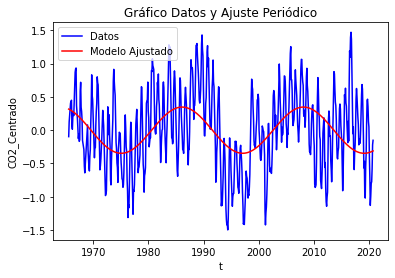

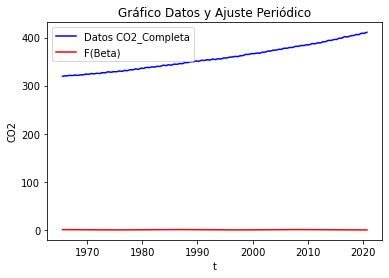

Los valores óptimos de F_beta son: 

97     0.316578
98     0.313036
99     0.309311
100    0.305530
101    0.301444
         ...   
755   -0.324386
756   -0.321305
757   -0.318143
758   -0.314695
759   -0.311062
Name: t_T, Length: 663, dtype: float64


Valor de beta_0:  0.3471167623464841
Valor de beta_1:  0.28539021013258925
Valor de beta_2:  1.993402899908326
Valor de beta_3:  1e-14
El tiempo de iteración es:  0.3030683994293213


In [30]:
start = time.time()
# Se define una función periódica.
def period(x,be0, be1, be2, be3):
    return be0*np.sin(be1*x+be2)*np.exp(be3*(x+1965.5370))

x = Datos_limpios.t_T
y = Datos_limpios.CO2_Centrado
z = Datos_limpios.CO2_Completa
w = Datos_limpios.Date

# parametros iniciales obtenidos de evaluaciones de be0, be1, be2 y be3, hasta tener 
# una conjetura inicial pausible, sin parametros iniciales curve_fit no converge
parametros_iniciales=[0.5, 0.3, 2, 10**-14]

popt,pcov = curve_fit(period, x, y,p0=parametros_iniciales)
be0,be1,be2,be3 = popt

# Se grafica la interpolación y la data original.

yperiod = period(x,be0, be1, be2, be3)
plt.title("Gráfico Datos y Ajuste Periódico")
plt.plot(w,y,color="blue",label='Datos')
plt.plot(w,yperiod,color="red",label='Modelo Ajustado')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2_Centrado')
plt.show()

yperiod = period(x,be0, be1, be2, be3)
plt.title("Gráfico Datos y Ajuste Periódico")
plt.plot(w,z,color="blue",label='Datos CO2_Completa')
plt.plot(w,yperiod,color="red",label='F(Beta)')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2')
plt.show()



# Se muestran por pantalla los resultados.
print('Los valores óptimos de F_beta son: \n')
print(yperiod) 
print('\n')
print('Valor de beta_0: ', be0) 
print('Valor de beta_1: ', be1) 
print('Valor de beta_2: ', be2) 
print('Valor de beta_3: ', be3) 
end = time.time()
tiempo_period=end-start
print('El tiempo de iteración es: ', tiempo_period) 

# Parte 6
Finalmente defina su aproximación como $F(t) = F_{\theta}(t) + F_{\beta}(t)$ con las funciones calculadas y
entregue la siguiente información
* Error cuadrático medio total entre $F(t)$ y CO2_completa.
* Gráfico que plotea simultaneamente CO2_completa y $F(t)$ (respecto al tiempo).
* Predicción que entrega $F(t)$ para todos los meses entre Octubre 2020 y Abril 2022.


c:\Users\Angel\anaconda3\lib\site-packages\scipy\optimize\minpack.py:833: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


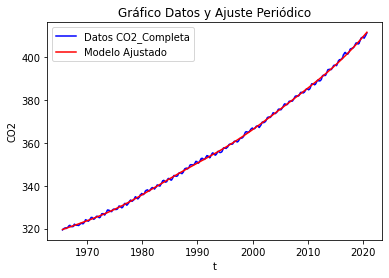

Los valores óptimos de F son: 

97     319.582143
98     319.657039
99     319.732042
100    319.804759
101    319.880055
          ...    
755    410.438589
756    410.693269
757    410.940691
758    411.197149
759    411.454505
Name: t_T, Length: 663, dtype: float64


El tiempo de iteración es:  0.5391216278076172


In [31]:
# Se define la funcion f(theta)+f(beta)
def funcion_theta_beta(x,be0, be1, be2, be3,a_4, b_4, c_4, d_4, e_4):
    return   be0*np.sin(be1*x+be2)*np.exp(be3*(x+1965.5370)) +a_4 + b_4*x + c_4*x**2 + d_4*x**3 + e_4*x**4

x = Datos_limpios.t_T
y = Datos_limpios.CO2_Centrado
z = Datos_limpios.CO2_Completa
w = Datos_limpios.Date

# se usan de parametros los valores encontrados como optimos en la parte 3 polinomio n=4 y parte 5

parametros=[0.3471167623464841, 0.28539021013258925, 1.993402899908326,10**-14,319.4872636683789, 0.8045470889766508, 0.0306496476575608 ,-0.0006625232668569394, 7.0517338192743766e-06  ]
be0, be1, be2, be3,a_4, b_4, c_4, d_4, e_4 =parametros
y_theta_beta_sinajuste = funcion_theta_beta(x,be0, be1, be2, be3,a_4, b_4, c_4, d_4, e_4)

# ajustando de nuevo usando de parametros iniciales los valores optimos obtenidos
popt,pcov = curve_fit(funcion_theta_beta, x, z,p0=parametros)
be0, be1, be2, be3,a_4, b_4, c_4, d_4, e_4 = popt
y_theta_beta = funcion_theta_beta(x,be0, be1, be2, be3,a_4, b_4, c_4, d_4, e_4)


# Se grafica la interpolación y la data original.
plt.title("Gráfico Datos y Ajuste Periódico")
plt.plot(w,z,color="blue",label='Datos CO2_Completa')
plt.plot(w,y_theta_beta,color="red",label='Modelo Ajustado')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2')
plt.show() 

# Se muestran por pantalla los resultados.
print('Los valores óptimos de F son: \n')
print(y_theta_beta)
print('\n')
end = time.time()
tiempo_period=end-start
print('El tiempo de iteración es: ', tiempo_period)

In [32]:
print('ECM de ajuste polinomial grado 4 con CO2 completa: ', sum((z-ypol4)**2)/len(z))
print('ECM de ajuste suma de func s. a. con CO2 completa: ', sum((z-y_theta_beta_sinajuste)**2)/len(z))
print('ECM de ajuste suma de funciones  con CO2 completa: ', sum((z-y_theta_beta)**2)/len(z))


ECM de ajuste polinomial grado 4 con CO2 completa:  0.35615928247656403
ECM de ajuste suma de func s. a. con CO2 completa:  0.29576914947072475
ECM de ajuste suma de funciones  con CO2 completa:  0.28329728660033376


La nueva función del item 6 tiene un menor ECM que la hecha en el item 3, por lo que es una funcion de ajuste superior.

## Calculo de prediccion

In [33]:
# promedio de tiempo entre meses, para formar las nuevas fechas con aprox un mes entre cada fecha
w = Datos_limpios.Date
tiempo_entre_meses=[]

for i in range(97,760-1):
    tiempo_entre_meses.append(Datos_limpios.Date[i+1]-Datos_limpios.Date[i])
promedio_entre_meses=sum(tiempo_entre_meses)/len(tiempo_entre_meses)


cant_meses=3+12+4 # 3 meses + 1 año + 4 meses =19 meses
w = Datos_limpios.Date
t_original_y_prediccion=w.tolist()

# se guarda los t de los meses a predecir
for i in range(0,cant_meses):
    t_original_y_prediccion.append(t_original_y_prediccion[662+i]+promedio_entre_meses)

t_prediccion=t_original_y_prediccion[663:663+19]
t_prediccion
t_prediccion_df=pd.DataFrame(t_prediccion)

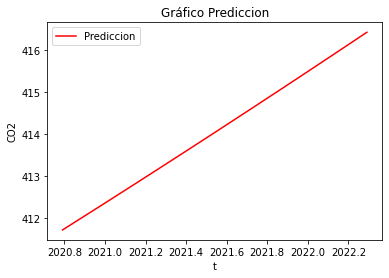

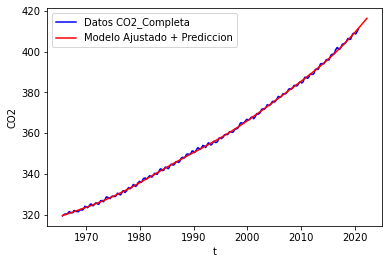

Los valores de CO2 predichos para todos los meses entre Octubre 2020 y Abril 2022: 

0     411.708604
1     411.963568
2     412.219395
3     412.476083
4     412.733629
5     412.992030
6     413.251283
7     413.511385
8     413.772334
9     414.034125
10    414.296756
11    414.560224
12    414.824526
13    415.089658
14    415.355616
15    415.622398
16    415.890001
17    416.158420
18    416.427653
Name: 0, dtype: float64


In [34]:
def funcion_theta_beta(x,be0, be1, be2, be3,a_4, b_4, c_4, d_4, e_4):
    return   be0*np.sin(be1*(x-1965.5370)+be2)*np.exp(be3*(x)) +a_4 + b_4*(x-1965.5370) + c_4*(x-1965.5370)**2 + d_4*(x-1965.5370)**3 + e_4*(x-1965.5370)**4


y_prediccion=funcion_theta_beta(t_prediccion_df.T.iloc[0],be0, be1, be2, be3,a_4, b_4, c_4, d_4, e_4)




# Se grafica la interpolación y la data original.
plt.title("Gráfico Prediccion")
plt.plot(t_prediccion_df.T.iloc[0],y_prediccion,color="red",label='Prediccion')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2')
plt.show() 


t_original_y_prediccion=pd.DataFrame(t_original_y_prediccion)


y_prediccion_completo=funcion_theta_beta(t_original_y_prediccion.T.iloc[0],be0, be1, be2, be3,a_4, b_4, c_4, d_4, e_4)

plt.title("")
plt.plot(w,z,color="blue",label='Datos CO2_Completa')
plt.plot(t_original_y_prediccion.T.iloc[0],y_prediccion_completo,color="red",label='Modelo Ajustado + Prediccion')

plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('CO2')


plt.show() 




# Se muestran por pantalla los resultados.
print('Los valores de CO2 predichos para todos los meses entre Octubre 2020 y Abril 2022: \n')
print(y_prediccion)





